#### Mountain Car Problem

##### Members:
        1. Amit Vikram Singh(111601001)
        2. Kuldeep Singh Bhandari(111601009)
        
##### Logic:
- Discretize position and velocity in 100 discrete  steps. State will be a fucntion of (pos, velocity).
- Now run the value iteration. At any time , we have three action [left, neutral, right]. For every time step reward is -1 except in the case agent pos >= 0.6, in this case reward is 0.
          

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
gridSize = (100, 100)
velocity = (-0.07, 0.07)
position = (-1.2, 0.6)
actionSet = [-1, 0, 1]
posStep = (position[1] - position[0])/(gridSize[0] - 1)
velStep = (velocity[1] - velocity[0])/(gridSize[1] - 1)

#Functio takes current position, current Velocity and claculates new velocity and then using new velocity
#... calculates new Position.
def updateFunction(oldPos, oldVel, action):
    newVel = oldVel + (action * 0.001) + np.cos(3*oldPos)*(-0.0025)
    newVel = min(max(newVel, velocity[0]), velocity[1])
    
    newPos = oldPos + newVel
    newPos = min(max(newPos, position[0]), position[1])
    
    if(newPos<= position[0]):
        newVel = 0
    
    return newPos, newVel

def normInfinity(currValue, optimalValue):
    maxDiff = 0
    for i in range(env.rowNum):
        for j in range(env.colNum):
            maxDiff = max(maxDiff, abs(currValue[i, j] - optimalValue[i, j]))
    return maxDiff

  
#returns true if agent reaches the goal
def reachedGoal(pos):
    if pos < 0.6:
        return False
    return True

#take pos, vel and returns corresponding indices in discrete world.
def getIndex(pos, vel):
    posInd = (pos - position[0])/posStep
    velInd = (vel - velocity[0])/velStep
    
    posInd = np.ceil(posInd)
    velInd = np.ceil(velInd)
    
    return int(posInd), int(velInd) 

#take indice for position, velocity in discrete world and retrun their corresponding values
#... in continuous world.
def getState(posInd, velInd):   #row, col
    pos = position[0] + posInd*posStep
    vel = velocity[0] + velInd*velStep
    
    return pos, vel

### Value Iteration

In [9]:
minNum = -1000000
gamma = 1
def valueIteration(value, policy):
    print("Value Iteration in progress")
    for iter1 in range(500):
        if(iter1%50 == 0): print("Iteration: ", iter1)
        for posInd in range(gridSize[0]):
            for velInd in range(gridSize[1]):
                optimalVal = minNum
                optimalAction = -1
                for action in actionSet:
                    currVal = 0
                    pos, vel = getState(posInd, velInd)
                    newPos, newVel = updateFunction(pos, vel, action)
                    newPosInd, newVelInd = getIndex(newPos, newVel)
    
                    if(reachedGoal(newPos)):
                        currVal += 0 + gamma*value[newPosInd, newVelInd]
                    else:
                        currVal += -1 + gamma*value[newPosInd, newVelInd]

                    if(currVal > optimalVal):
                        optimalVal = currVal
                        optimalAction = action

                value[posInd, velInd] = optimalVal
                policy[posInd, velInd] = optimalAction
    print("Value Itertion Finished")

#### Call Value iteration

In [10]:
value = np.zeros(gridSize)
policy = np.zeros(gridSize)
valueIteration(value, policy)

Value Iteration in progress
Iteration:  0
Iteration:  50
Iteration:  100
Iteration:  150
Iteration:  200
Iteration:  250
Iteration:  300
Iteration:  350
Iteration:  400
Iteration:  450
Value Itertion Finished


#### Heatmap of value function

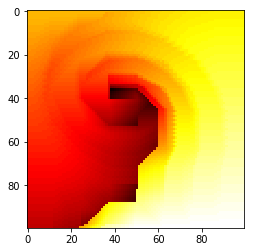

In [6]:
plt.imshow(value, cmap = "hot" , interpolation="nearest")
plt.show()

In [7]:
np.savetxt("value.txt", value, fmt = "%i")
np.savetxt("policy.txt", policy, fmt = "%i")